Running simulation with 1 layers...
Number of layers 1
Step 0 out of 40
Step 5 out of 40
Step 10 out of 40
Step 15 out of 40
Step 20 out of 40
Step 25 out of 40
Step 30 out of 40
Step 35 out of 40


KeyError: 'components'

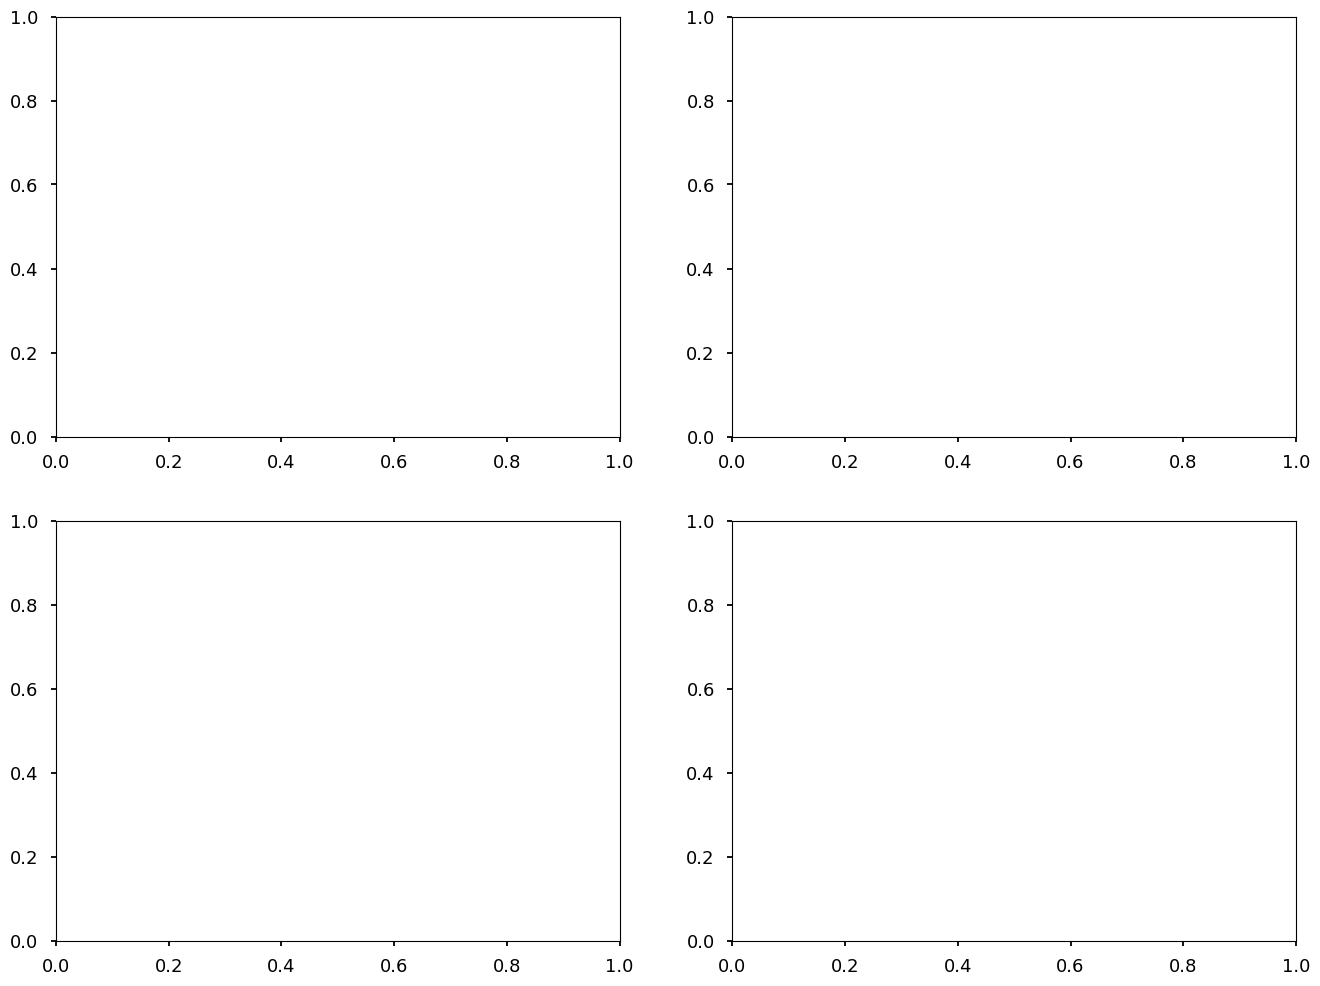

In [1]:
# from imports import *
# from exactDiagMethods import perform_exact_diag, build_exact_diag_hamiltonian
# from globalMethods import build_initial_states, output_results
# from vqteMethods import  hamiltonian_generation, perform_vqte
# from fidelity_calculate import calculateFidelity, plot_multiple_fidelity_vs_layers
from fidelity_main import run_multiple_layers


def main():
    run_multiple_layers(1)
    
main()


In [ ]:
# # Initialize the simulation parameters
# def main():
#     gamma_L = 2
#     gamma_R = 3

#     eps = 1.0

#     mu_L= 1
#     mu_R= 2

#     # Temperature of Reserviors
#     T_L = 1
#     T_R= 1

#     time = 1.5
#     dt = 0.6
#     nt = int(time/dt)

#     beta_L=1/T_L
#     beta_R=1/T_R
#     F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
#     F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)

#     # Generate Hamiltonians
#     exact_diag_ham = build_exact_diag_hamiltonian(eps)
#     ham_real, ham_imag = hamiltonian_generation(eps, gamma_L, gamma_R, F_R,F_L)



#     # Generate initial states
#     vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)
#     print("VQTE Initial State : " , vqte_init_state)
#     print("Exact Initial : ", exact_diag_init_state)

#     # Perform exact diagonalization
#     exact_diag_results, time_points = perform_exact_diag(gamma_L, F_L, gamma_R, F_R, dt, nt, exact_diag_init_state, exact_diag_ham)

#     # Perform vqte simulation
#     vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values)


#     output_results(
#     vqte_results, 
#     exact_diag_results, 
#     time_points, 
#     mu_L, T_L, gamma_L, 
#     mu_R, T_R, gamma_R)




# main()

# ## run multiple times with diff ansatz layers
# ## Get fidelity.
# ## Also save fidelity results to file
# ## Plot fidelity vs time for different ansatz layers
# ## Plot component by component comparison for different ansatz layers


In [ ]:
main()

Running simulation with 1 layers...
Number of layers 1
Step 0 out of 40
Step 5 out of 40
Step 10 out of 40
Step 15 out of 40
Step 20 out of 40
Step 25 out of 40
Step 30 out of 40
Step 35 out of 40


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def save_fidelity_results(layers_list, fidelity_results, filename):
    """Saves fidelity vs layers results to file"""
    with open(filename, 'w') as f:
        f.write("Layers\tFidelity\n")
        for layers, fidelity in zip(layers_list, fidelity_results):
            f.write(f"{layers}\t{fidelity:.6f}\n")

def load_fidelity_results(filename):
    """Loads fidelity vs layers results from file"""
    layers_list = []
    fidelity_results = []
    with open(filename, 'r') as f:
        next(f)  # Skip header
        for line in f:
            layers, fidelity = map(float, line.strip().split('\t'))
            layers_list.append(int(layers))
            fidelity_results.append(fidelity)
    return layers_list, fidelity_results

def plot_fidelity_vs_layers(layers_list, fidelity_results, params):
    """
    Plots fidelity as a function of ansatz layers
    """
    plt.style.use('seaborn-v0_8-talk')
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(layers_list, fidelity_results, 'o-', linewidth=2, markersize=8, color='#003594')
    
    ax.set_title("Fidelity vs Ansatz Layers", fontsize=20, pad=20)
    ax.set_xlabel("Number of Ansatz Layers", fontsize=16)
    ax.set_ylabel("Fidelity", fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    
    # Add parameter info
    params_text = (
        f"$\\gamma_L = {params['gamma_L']:.1f}$, $\\gamma_R = {params['gamma_R']:.1f}$\n"
        f"$\\mu_L = {params['mu_L']:.1f}$, $\\mu_R = {params['mu_R']:.1f}$\n"
        f"$T_L = {params['T_L']:.1f}$, $T_R = {params['T_R']:.1f}$\n"
        f"$\\Delta t = {params['dt']:.2f}$, Time = {params['time']:.1f}$"
    )
    
    ax.text(0.02, 0.98, params_text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='lightgray', alpha=0.8, boxstyle='round,pad=0.5'))
    
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.05)  # Fidelity ranges from 0 to 1
    plt.tight_layout()
    plt.show()


def run_multiple_layers():
    params = {
        'gamma_L': 2,
        'gamma_R': 3,
        'eps': 1.0,
        'mu_L': 1,
        'mu_R': 2,
        'T_L': 1,
        'T_R': 1,
        'time': 4,
        'dt': 0.1,
    }
    
    maxLayers = 6
    layers_list = list(range(1, maxLayers + 1))
    fidelity_results = []
    final_vqte_values = []
    final_exact_values = []
    
    os.makedirs('fidelity_results', exist_ok=True)
    
    for layers in layers_list:
        print(f"Running simulation with {layers} layers...")
        
        eps = params['eps']
        nt = int(params['time'] / params['dt'])
        
        beta_L = 1 / params['T_L']
        beta_R = 1 / params['T_R']
        F_L = 1 / (np.exp(beta_L * (eps - params['mu_L'])) + 1)
        F_R = 1 / (np.exp(beta_R * (eps - params['mu_R'])) + 1)
        
        exact_diag_ham = build_exact_diag_hamiltonian(eps)
        ham_real, ham_imag = hamiltonian_generation(eps, params['gamma_L'], params['gamma_R'], F_R, F_L)
        
        ansatz = EfficientSU2(ham_real.num_qubits, reps = layers)
        print('Number of layers', layers)
        # Build initial states with specified number of layers
        vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real, ansatz)
        
        # Run simulations
        exact_diag_results, time_points = perform_exact_diag(
            params['gamma_L'], F_L, params['gamma_R'], F_R, 
            params['dt'], nt, exact_diag_init_state, exact_diag_ham
        )
        
        vqte_results = perform_vqte(
            ham_real, ham_imag, vqte_init_state, 
            params['dt'], nt, ansatz, init_param_values
        )
        all_time_fidelities = calculate_fidelity(vqte_results, exact_diag_results)
        
        
        # Get final values for fidelity calculation
        final_vqte = vqte_results[-1]
        final_exact = exact_diag_results[-1]
        
        final_vqte_values.append(final_vqte)
        final_exact_values.append(final_exact)
        
        # Calculate fidelity
        fidelity = calculate_fidelity(final_vqte, final_exact)
        fidelity_results.append(fidelity)
        
        print(f"Layers: {layers}, Fidelity: {fidelity:.4f}, VQTE final: {final_vqte:.4f}, Exact final: {final_exact:.4f}")
    
    # Save results
    fidelity_filename = f'fidelity_results/fidelity_vs_layers.txt'
    save_fidelity_results(layers_list, fidelity_results, fidelity_filename)
    
    # Also save detailed results for each layer
    detailed_filename = f'fidelity_results/detailed_results.txt'
    with open(detailed_filename, 'w') as f:
        f.write("Layers\tFidelity\tVQTE_Final\tExact_Final\n")
        for layers, fidelity, vqte, exact in zip(layers_list, fidelity_results, final_vqte_values, final_exact_values):
            f.write(f"{layers}\t{fidelity:.6f}\t{vqte:.6f}\t{exact:.6f}\n")
    
    # Plot results
    plot_fidelity_vs_layers(layers_list, fidelity_results, params)
    print(fidelity_results)
    
    return layers_list, fidelity_results

# Run the simulation
layers, fidelities = run_multiple_layers()

Running simulation with 1 layers...


NameError: name 'build_exact_diag_hamiltonian' is not defined

In [ ]:
ansatz.draw()